In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train=pd.read_csv("train.csv")
df_train["source"]="train"
df_test=pd.read_csv("test.csv")
df_test["source"]="test"
df=pd.concat([df_train,df_test],ignore_index=True)

In [4]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


In [5]:
df.shape

(351037, 12)

In [6]:
df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
source                      0
dtype: int64

In [13]:
#Checking unique values 
df.nunique()

ID                     351037
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              3
Avg_Account_Balance    162137
Is_Active                   2
Is_Lead                     2
source                      2
dtype: int64

In [7]:
df['Credit_Product']= df['Credit_Product'].fillna("NA")

In [8]:
#Changing Yes to 1 and No to 0 in Is_Active column to covert  data into float
df["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)
df['Is_Active'] = df['Is_Active'].astype(float)

In [9]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,0.0,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,0.0,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,1.0,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,0.0,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,0.0,0.0,train


Using Label Encoder

In [10]:
#Creating list of categorical columns
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()       #creating instance
for col in cat_col:
  df[col]= le.fit_transform(df[col])
df_2= df
df_2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0.0,0.0,train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0.0,0.0,train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1.0,0.0,train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0.0,0.0,train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0.0,0.0,train


Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


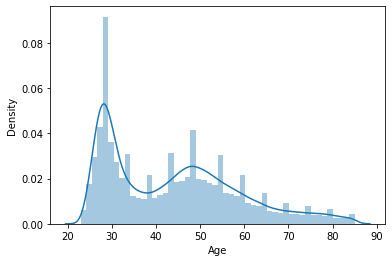

In [17]:
sns.distplot(df['Age']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


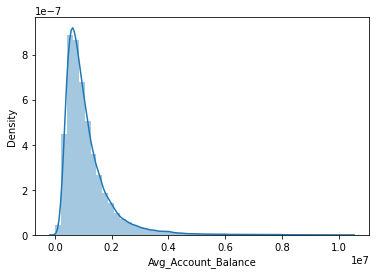

In [18]:
sns.distplot(df['Avg_Account_Balance'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


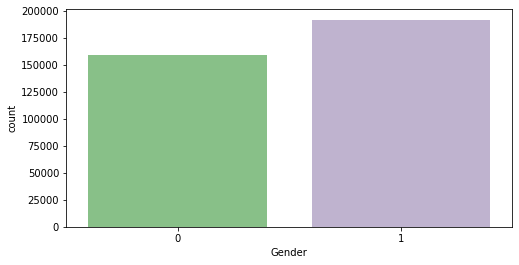

In [19]:
#Countplot for Gender feature 
plt.figure(figsize=(8,4))
sns.countplot(df['Gender'],palette='Accent')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.0    187437
1.0     58288
Name: Is_Lead, dtype: int64


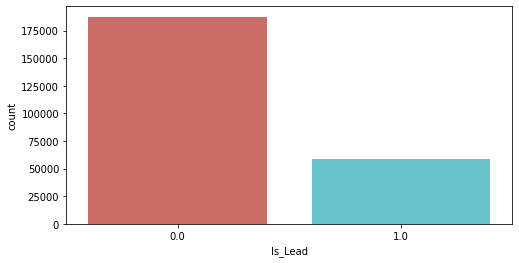

In [20]:
#Countplot for Target variable i.e 'Is_Lead'
target = 'Is_Lead'
plt.figure(figsize=(8,4))
sns.countplot(df[target],palette='hls')
print(df[target].value_counts())

Bivariate Analysis

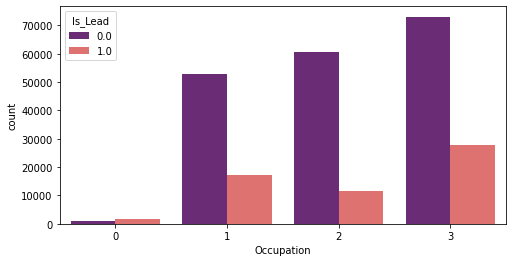

In [21]:
#Checking occupation with customers
plt.figure(figsize=(8,4))
sns.countplot(x='Occupation',hue='Is_Lead',data=df,palette= 'magma')
plt.show()

<Figure size 576x288 with 0 Axes>

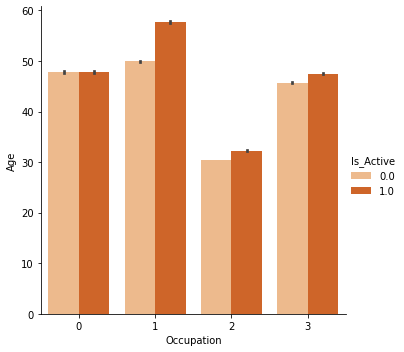

In [22]:
#Plot showing Activness of customer in last 3 months with respect to Occupation of customer
plt.figure(figsize=(8,4))
sns.catplot(y='Age',x='Occupation',hue='Is_Active',data=df,kind='bar',palette='Oranges')
plt.show()

Data Preparation

In [23]:
# To balance the dataset , we will apply undersampling method
from sklearn.utils import resample
# separate the minority and majority classes
df_majority = df_1[df_1['Is_Lead']==0]
df_minority = df_1[df_1['Is_Lead']==1]

print(" The majority class values are", len(df_majority))
print(" The minority class values are", len(df_minority))
print(" The ratio of both classes are", len(df_majority)/len(df_minority))

 The majority class values are 187437
 The minority class values are 58288
 The ratio of both classes are 3.215704776283283


In [24]:
# undersample majority class
df_majority_undersampled = resample(df_majority, replace=True, n_samples=len(df_minority), random_state=0)
# combine minority class with oversampled majority class
df_undersampled = pd.concat([df_minority, df_majority_undersampled])

df_undersampled['Is_Lead'].value_counts()
df_1=df_undersampled

# display new class value counts
print(" The undersamples class values count is:", len(df_undersampled))
print(" The ratio of both classes are", len(df_undersampled[df_undersampled["Is_Lead"]==0])/len(df_undersampled[df_undersampled["Is_Lead"]==1]))

 The undersamples class values count is: 116576
 The ratio of both classes are 1.0


In [25]:
# dropping target variable 
#assign the value of y for training and testing phase
xc = df_1.drop(columns=['Is_Lead'])
yc = df_1[["Is_Lead"]]

In [26]:
df_1.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
6,1,62,32,1,2,20,0,1056750,1.0,1.0
15,1,33,18,3,1,69,0,517063,1.0,1.0
16,0,46,18,1,2,97,2,2282502,0.0,1.0
17,0,59,33,1,2,15,2,2384692,0.0,1.0
20,1,44,19,3,1,19,2,1001650,0.0,1.0


Data Preparation for Credit Card Lead Prediction

In [14]:
#Now changing all categorical column into numerical form using label endcoding
cat_col=[ 'Gender', 'Region_Code', 'Occupation','Channel_Code', 'Credit_Product']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
  df[col]= le.fit_transform(df[col])


df_2= df
df_2.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,source
0,NNVBBKZB,0,73,18,1,2,43,1,1045696,0.0,0.0,train
1,IDD62UNG,0,30,27,2,0,32,1,581988,0.0,0.0,train
2,HD3DSEMC,0,56,18,3,2,26,1,1484315,1.0,0.0,train
3,BF3NC7KV,1,34,20,2,0,19,1,470454,0.0,0.0,train
4,TEASRWXV,0,30,32,2,0,33,1,886787,0.0,0.0,train


In [15]:
#Separating the train and test
df_train=df_2.loc[df_2["source"]=="train"]
df_test=df_2.loc[df_2["source"]=="test"]
df_1 = df_train

In [16]:
#we can drop column as they are irrelevant and have no effect on our data
df_1.drop(columns=['ID',"source"],inplace=True)
df_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0.0,0.0
1,0,30,27,2,0,32,1,581988,0.0,0.0
2,0,56,18,3,2,26,1,1484315,1.0,0.0
3,1,34,20,2,0,19,1,470454,0.0,0.0
4,0,30,32,2,0,33,1,886787,0.0,0.0


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc = pd.DataFrame(sc.fit_transform(xc),columns=xc.columns)

Classification Modelling

In [33]:
#Importing necessary libraries
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [34]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_xc,yc,random_state = 42,test_size = 0.2,stratify = yc)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
      roc_scr_max=roc_score
      final_model = model_c
      mean_acc = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").mean()
      std_dev = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy").std()
      cross_val = cross_val_score(final_model,df_xc,yc,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [39]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,df_xc,yc)

**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.727315712597147 
 Mean accuracy score is :  0.6696918411779096 
 Std deviation score is :  0.0030322593046897828 
 Cross validation scores are :   [0.67361469 0.66566588 0.66703839 0.67239974 0.66974051]
roc_auc_score: 0.727315712597147
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.8790888141859429 
 Mean accuracy score is :  0.8110503043215302 
 Std deviation score is :  0.002044764139325201 
 Cross validation scores are :   [0.81090238 0.81055115 0.80900708 0.81098006 0.8149689 ]
roc_auc_score: 0.8790888141859429
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.7421084234

First Attempt:Random Forest Classifier

In [40]:
# Estimating best n_estimator using grid search for Randomforest Classifier
parameters={"n_estimators":[1,10,100]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="roc_auc")
clf.fit(df_xc,yc)
print("Best parameter : ",clf.best_params_,"\nBest Estimator : ", clf.best_estimator_,"\nBest Score : ", clf.best_score_)

Best parameter :  {'n_estimators': 100} 
Best Estimator :  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
Best Score :  0.8812538533023109


In [41]:
#Again running RFC with n_estimator = 100
rf_clf=RandomForestClassifier(n_estimators=100,random_state=42)
max_accuracy_scr("RandomForest Classifier",rf_clf,df_xc,yc)

**************************************************
Results for model :  RandomForest Classifier 
 max roc score correspond to random state  0.879415808805665 
 Mean accuracy score is :  0.8115392510996895 
 Std deviation score is :  0.0008997445291505284 
 Cross validation scores are :   [0.81180305 0.81136607 0.81106584 0.81037958 0.81308171]
roc_auc_score: 0.879415808805665
**************************************************


In [42]:
xc_train,xc_test,yc_train,yc_test=train_test_split(df_xc, yc,random_state = 80,test_size=0.20,stratify=yc)
rf_clf.fit(xc_train,yc_train)
yc_pred=rf_clf.predict(xc_test)

 ROC_AUC score is  0.8804566893762799
accuracy score is :  0.8127466117687425
Precision is :  0.8397949673811743
Recall is:  0.7729456167438669
F1 Score is :  0.8049848132928354
classification report 
               precision    recall  f1-score   support

         0.0       0.79      0.85      0.82     11658
         1.0       0.84      0.77      0.80     11658

    accuracy                           0.81     23316
   macro avg       0.81      0.81      0.81     23316
weighted avg       0.81      0.81      0.81     23316



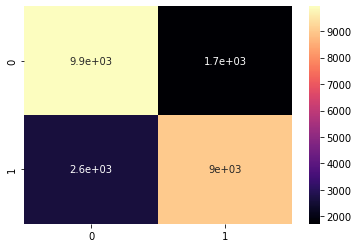

In [43]:
#  Random Forest Classifier Results

pred_pb=rf_clf.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,pred_pb,pos_label=True)
auc = roc_auc_score(yc_test,pred_pb)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,yc_pred))
print("Precision is : " ,precision_score(yc_test, yc_pred))
print("Recall is: " ,recall_score(yc_test, yc_pred))
print("F1 Score is : " ,f1_score(yc_test, yc_pred))
print("classification report \n",classification_report(yc_test,yc_pred))

#Plotting confusion matrix
cnf = confusion_matrix(yc_test,yc_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

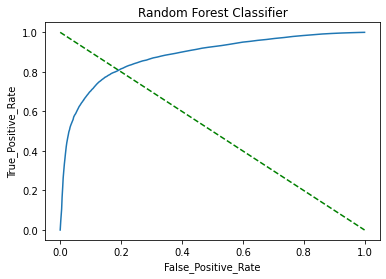

In [44]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("Random Forest Classifier")
plt.show()

Second Attempt: XG Boost Classifer

In [45]:
#Trying XGBoost
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight

clf2 = xg.XGBClassifier(class_weight='balanced').fit(xc_train, yc_train)
class_weight.compute_class_weight('balanced', np.unique(yc_train), yc_train["Is_Lead"])
xg_pred = clf2.predict(xc_test)

 ROC_AUC score is  0.8694684921592073
accuracy score is :  0.8006090238462858
Precision is :  0.8253040007425972
Recall is:  0.7626522559615715
F1 Score is :  0.7927421871517097
classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.83      0.76      0.79     11658

    accuracy                           0.80     23316
   macro avg       0.80      0.80      0.80     23316
weighted avg       0.80      0.80      0.80     23316



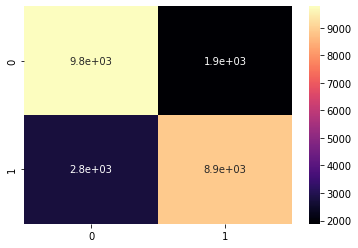

In [46]:
#XG Boost Results
xg_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,xg_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,xg_pred_2)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(yc_test,xg_pred))
print("Precision is : " ,precision_score(yc_test, xg_pred))
print("Recall is: " ,recall_score(yc_test, xg_pred))
print("F1 Score is : " ,f1_score(yc_test, xg_pred))
print("classification report \n",classification_report(yc_test,xg_pred))

cnf = confusion_matrix(yc_test,xg_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

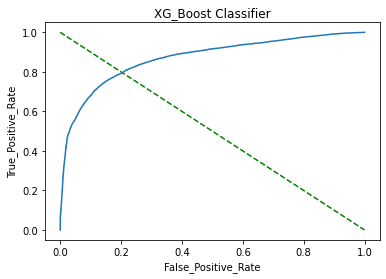

In [47]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("XG_Boost Classifier")
plt.show()

Third Attempt: LGBM Model with Stratification Folds

In [48]:
#Trying stratification modeling
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(xc, yc, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(xc, yc)):
        print(f"Fold: {fold}")
        xc_train, yc_train = xc.iloc[train_idx], yc.iloc[train_idx]
        xc_test, yc_test = xc.iloc[test_idx], yc.iloc[test_idx]

        model_c= model(**params)
        model_c.fit(xc_train, yc_train,eval_set=[(xc_test, yc_test)],early_stopping_rounds=100, verbose=300)

        pred_y = model_c.predict_proba(xc_test)[:, 1]
        roc_score = roc_auc_score(yc_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return model_c

In [49]:
#Applying LGBM Model with 10 stratified cross-folds
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 'n_estimators': 10000,'max_bin': 84,'num_leaves': 10,'max_depth': 20,'reg_alpha': 8.457,'reg_lambda': 6.853,'subsample': 0.749}
lgb_model = cross_val(xc, yc, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds.
[300]	valid_0's binary_logloss: 0.43378
[600]	valid_0's binary_logloss: 0.433618
Early stopping, best iteration is:
[726]	valid_0's binary_logloss: 0.433573
roc_auc_score: 0.8747079699614221
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds.
[300]	valid_0's binary_logloss: 0.434887
[600]	valid_0's binary_logloss: 0.434483
Early stopping, best iteration is:
[613]	valid_0's binary_logloss: 0.434462
roc_auc_score: 0.87552816604503
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds.
[300]	valid_0's binary_logloss: 0.431872
[600]	valid_0's binary_logloss: 0.431268
Early stopping, best iteration is:
[795]	valid_0's binary_logloss: 0.431087
roc_auc_score: 0.8768318033827408
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 10

 ROC_AUC score is  0.8694684921592073
accuracy score is :  0.8036541430777149
Precision is :  0.8259068311544835
Recall is:  0.7695144964831018
F1 Score is :  0.7967140319715809
classification report 
               precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     11658
         1.0       0.83      0.77      0.80     11658

    accuracy                           0.80     23316
   macro avg       0.81      0.80      0.80     23316
weighted avg       0.81      0.80      0.80     23316



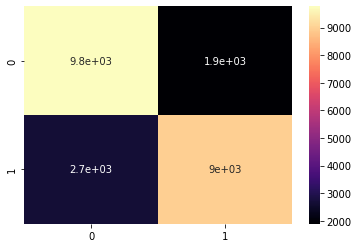

In [50]:
#LGBM results
lgb_pred_2=clf2.predict_proba(xc_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(yc_test,lgb_pred_2,pos_label=True)
auc = roc_auc_score(yc_test,lgb_pred_2)

print(" ROC_AUC score is ",auc)
lgb_model.fit(xc_train,yc_train)
lgb_pred=lgb_model.predict(xc_test)
print("accuracy score is : ",accuracy_score(yc_test,lgb_pred))
print("Precision is : " ,precision_score(yc_test, lgb_pred))
print("Recall is: " ,recall_score(yc_test, lgb_pred))
print("F1 Score is : " ,f1_score(yc_test, lgb_pred))
print("classification report \n",classification_report(yc_test,lgb_pred))

cnf = confusion_matrix(yc_test,lgb_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

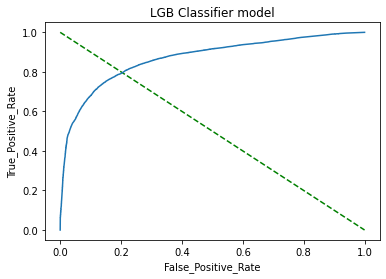

In [51]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("LGB Classifier model")
plt.show()

Prediction

In [52]:
#we can drop column as they are irrelevant and have no effect on our data
df_3 = df_test

In [53]:
df_3.drop(columns=["source"],inplace=True)
df_3.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [54]:
# dropping target variable 
#assign the value of y for training and testing phase
xc_pred = df_3.drop(columns=['Is_Lead',"ID"])

#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_xc_pred = pd.DataFrame(sc.fit_transform(xc_pred),columns=xc_pred.columns)

In [55]:
lead_pred_xg=clf2.predict_proba(df_xc_pred)[:,1]
lead_pred_lgb=lgb_model.predict_proba(df_xc_pred)[:,1]
lead_pred_rf=rf_clf.predict_proba(df_xc_pred)[:,1]
print(lead_pred_xg, lead_pred_lgb, lead_pred_rf)

[0.15022086 0.9395936  0.15303788 ... 0.24841532 0.3684299  0.14877708] [0.13825026 0.94082028 0.13857711 ... 0.24325021 0.23395496 0.16656092] [0.17 0.97 0.09 ... 0.5  0.09 0.15]


In [56]:
#Dataframe for lead prediction
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Is_Lead"])
lead_pred_xg= pd.DataFrame(lead_pred_xg,columns=["Is_Lead"])
lead_pred_rf= pd.DataFrame(lead_pred_rf,columns=["Is_Lead"])

In [57]:
df_test = df_test.reset_index()
df_test.head()

,index,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,245725,VBENBARO,1,29,4,1,0,25,2,742366,0.0,NaN
1,245726,CCMEWNKY,1,43,18,1,1,49,0,925537,0.0,NaN
2,245727,VK3KGA9M,1,31,20,2,0,14,1,215949,0.0,NaN
3,245728,TT8RPZVC,1,29,22,1,0,33,1,868070,0.0,NaN
4,245729,SHQZEYTZ,0,29,20,1,0,19,1,657087,0.0,NaN


In [58]:
#Saving ID  and prediction to csv file for XG Model
df_pred_xg=pd.concat([df_test["ID"],lead_pred_xg],axis=1,ignore_index=True)
df_pred_xg.columns = ["ID","Is_Lead"]
print(df_pred_xg.head())
df_pred_xg.to_csv("Credit_Card_Lead_Predictions_final_xg.csv",index=False)

#Saving ID  and prediction to csv file for LGB Model
df_pred_lgb=pd.concat([df_test["ID"],lead_pred_lgb],axis=1,ignore_index=True)
df_pred_lgb.columns = ["ID","Is_Lead"]
print(df_pred_lgb.head())
df_pred_lgb.to_csv("Credit_Card_Lead_Predictions_final_lgb.csv",index=False)

#Saving ID  and prediction to csv file for RF model
df_pred_rf=pd.concat([df_test["ID"],lead_pred_rf],axis=1,ignore_index=True)
df_pred_rf.columns = ["ID","Is_Lead"]
print(df_pred_rf.head())
df_pred_rf.to_csv("Credit_Card_Lead_Predictions_final_rf.csv",index=False)

         ID   Is_Lead
0  VBENBARO  0.150221
1  CCMEWNKY  0.939594
2  VK3KGA9M  0.153038
3  TT8RPZVC  0.070754
4  SHQZEYTZ  0.075830
         ID   Is_Lead
0  VBENBARO  0.138250
1  CCMEWNKY  0.940820
2  VK3KGA9M  0.138577
3  TT8RPZVC  0.083907
4  SHQZEYTZ  0.056498
         ID  Is_Lead
0  VBENBARO     0.17
1  CCMEWNKY     0.97
2  VK3KGA9M     0.09
3  TT8RPZVC     0.12
4  SHQZEYTZ     0.09


Saving the model

In [59]:
import joblib
#save the model as a pickle in a file 
joblib.dump(lgb_model,'lgb_model.pkl')

['lgb_model.pkl']